In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_excel('transactiondata.xlsx')
df.head(100)

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FAM002,FAM002_Member1,2024-10-18,Food,122.76,44592,29492,5630,4541,995,3,60
96,FAM002,FAM002_Member1,2024-10-03,Healthcare,360.31,44592,29492,5630,4541,995,3,60
97,FAM002,FAM002_Member1,2024-10-17,Healthcare,390.53,44592,29492,5630,4541,995,3,60
98,FAM002,FAM002_Member1,2024-10-26,Travel,117.47,44592,29492,5630,4541,995,3,60


In [3]:
df.describe(include='all')

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306,16306,16306,16306,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
unique,200,926,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FAM194,FAM194_Member7,NaN,Groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,167,30,NaN,2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2024-10-16 00:34:31.777259776,NaN,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
min,NaN,NaN,2024-10-01 00:00:00,NaN,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,NaN,NaN,2024-10-08 00:00:00,NaN,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,NaN,NaN,2024-10-16 00:00:00,NaN,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,NaN,NaN,2024-10-24 00:00:00,NaN,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,NaN,NaN,2024-10-31 00:00:00,NaN,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000


In [4]:
df['Category'].unique()

array(['Travel', 'Groceries', 'Healthcare', 'Education', 'Utilities',
       'Food', 'Entertainment'], dtype=object)

In [5]:
df.columns

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')

In [6]:
# 926 ppl from 200 families, 7 categories of expenses
quant_values = df[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)']]
quant_values.head(10)

,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,113810,20234,5781,2422,2959,2,68
1,113810,20234,5781,2422,2959,2,68
2,113810,20234,5781,2422,2959,2,68
3,113810,20234,5781,2422,2959,2,68
4,113810,20234,5781,2422,2959,2,68
5,113810,20234,5781,2422,2959,2,68
6,113810,20234,5781,2422,2959,2,68
7,113810,20234,5781,2422,2959,2,68
8,113810,20234,5781,2422,2959,2,68
9,113810,20234,5781,2422,2959,2,68


In [7]:
quant_values.corr()

,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
Income,1.000000,-0.108340,-0.041355,-0.073053,-0.123225,0.005717,-0.094626
Savings,-0.108340,1.000000,-0.082094,-0.125158,0.022499,-0.012153,-0.090095
Monthly Expenses,-0.041355,-0.082094,1.000000,-0.052883,-0.046059,0.028577,0.003698
Loan Payments,-0.073053,-0.125158,-0.052883,1.000000,0.025535,-0.019567,0.034911
Credit Card Spending,-0.123225,0.022499,-0.046059,0.025535,1.000000,-0.033939,0.010204
Dependents,0.005717,-0.012153,0.028577,-0.019567,-0.033939,1.000000,-0.027768
Financial Goals Met (%),-0.094626,-0.090095,0.003698,0.034911,0.010204,-0.027768,1.000000


In [8]:
#Absolutely no linear correlations
import seaborn as sns 
import matplotlib.pyplot as plt 

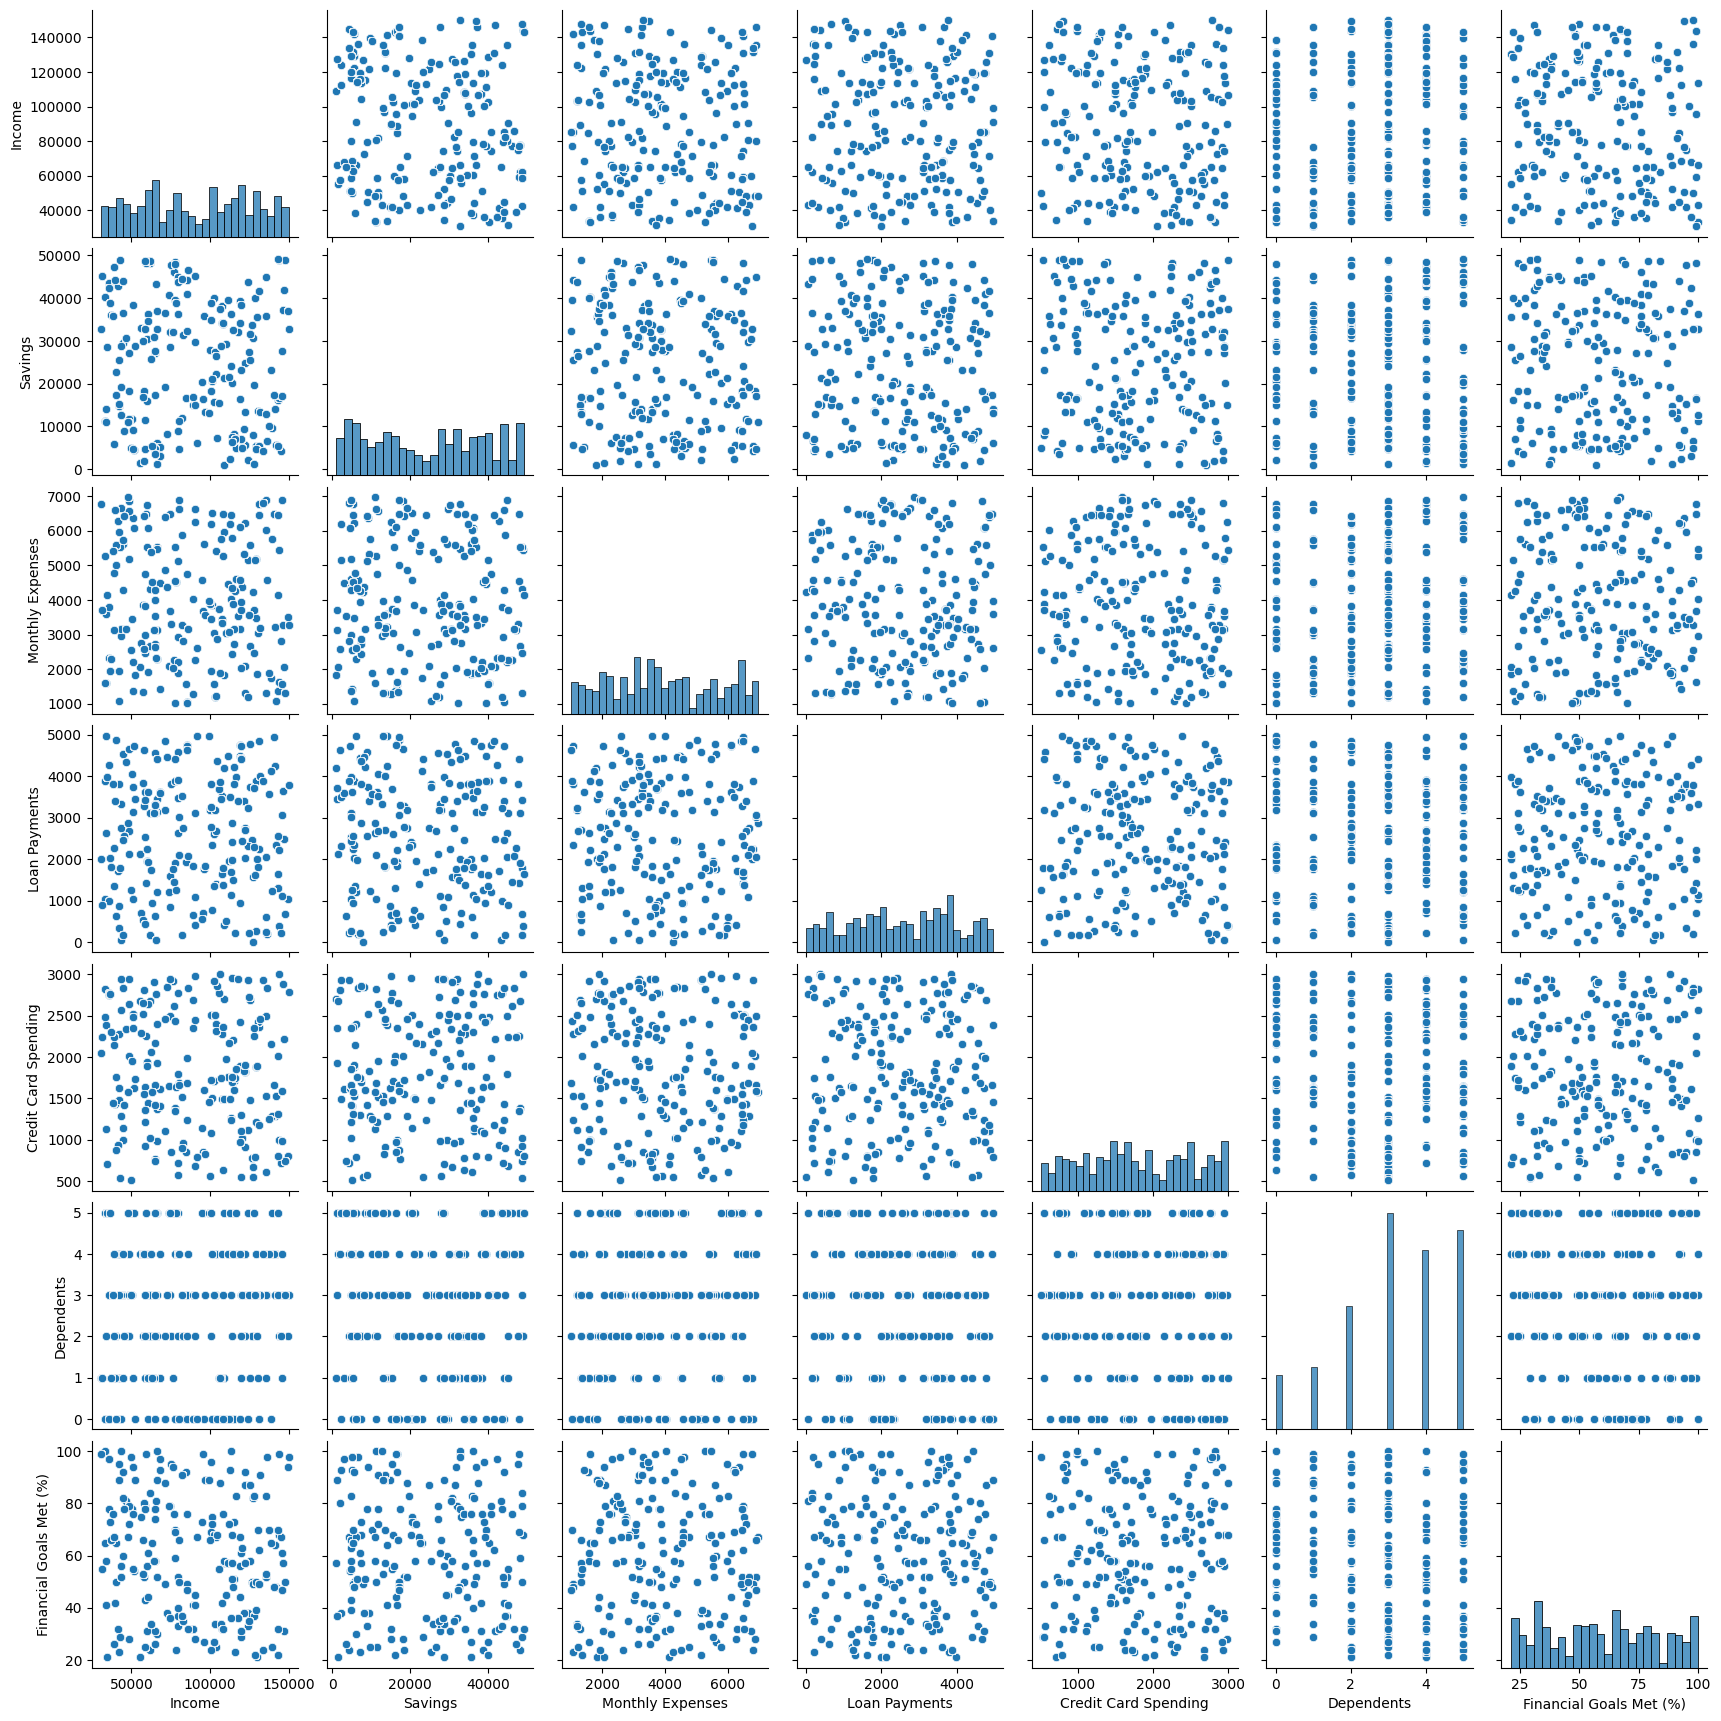

In [9]:
sns.pairplot(quant_values)
plt.show()

In [10]:
#No major revelations here either
#perhaps family data summed
familydata = df[['Family ID','Amount','Income', 'Savings', 'Monthly Expenses', 'Loan Payments','Credit Card Spending']].groupby('Family ID').sum()
familydata


,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending
Family ID,,,,,,
FAM001,23188.90,10584330,1881762,537633,225246,275187
FAM002,22309.71,3924096,2595296,495440,399608,87560
FAM003,11220.34,1564066,534155,248254,48974,132446
FAM004,23483.10,12083620,2919825,341145,149245,63460
FAM005,40246.21,10897920,199980,517440,568260,317130
...,...,...,...,...,...,...
FAM196,31433.34,8056652,446896,438092,77128,92256
FAM197,4032.82,2484079,790229,122797,92150,22401
FAM198,19378.59,8664912,484272,330220,151164,133684


In [11]:
family_member_counts = df.groupby('Family ID')['Member ID'].nunique()
family_member_counts = family_member_counts.reset_index()
family_member_counts.columns = ['Family ID', 'Member Count']
family_member_counts

,Family ID,Member Count
0,FAM001,4
1,FAM002,5
2,FAM003,2
3,FAM004,5
4,FAM005,7
...,...,...
195,FAM196,7
196,FAM197,2
197,FAM198,4
198,FAM199,7


In [12]:
goalpercentagedf = df[['Family ID','Financial Goals Met (%)']].drop_duplicates()
goalpercentagedf

,Family ID,Financial Goals Met (%)
0,FAM001,68
93,FAM002,60
181,FAM003,100
228,FAM004,82
323,FAM005,89
...,...,...
15866,FAM196,26
15990,FAM197,62
16009,FAM198,51
16085,FAM199,36


In [13]:
familydata = familydata.merge(family_member_counts, how='right',on='Family ID')
familydata = familydata.merge(goalpercentagedf, how='right',on='Family ID')
familydata

,Family ID,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Member Count,Financial Goals Met (%)
0,FAM001,23188.90,10584330,1881762,537633,225246,275187,4,68
1,FAM002,22309.71,3924096,2595296,495440,399608,87560,5,60
2,FAM003,11220.34,1564066,534155,248254,48974,132446,2,100
3,FAM004,23483.10,12083620,2919825,341145,149245,63460,5,82
4,FAM005,40246.21,10897920,199980,517440,568260,317130,7,89
...,...,...,...,...,...,...,...,...,...
195,FAM196,31433.34,8056652,446896,438092,77128,92256,7,26
196,FAM197,4032.82,2484079,790229,122797,92150,22401,2,62
197,FAM198,19378.59,8664912,484272,330220,151164,133684,4,51
198,FAM199,31009.65,8726679,3331458,429624,97578,343629,7,36


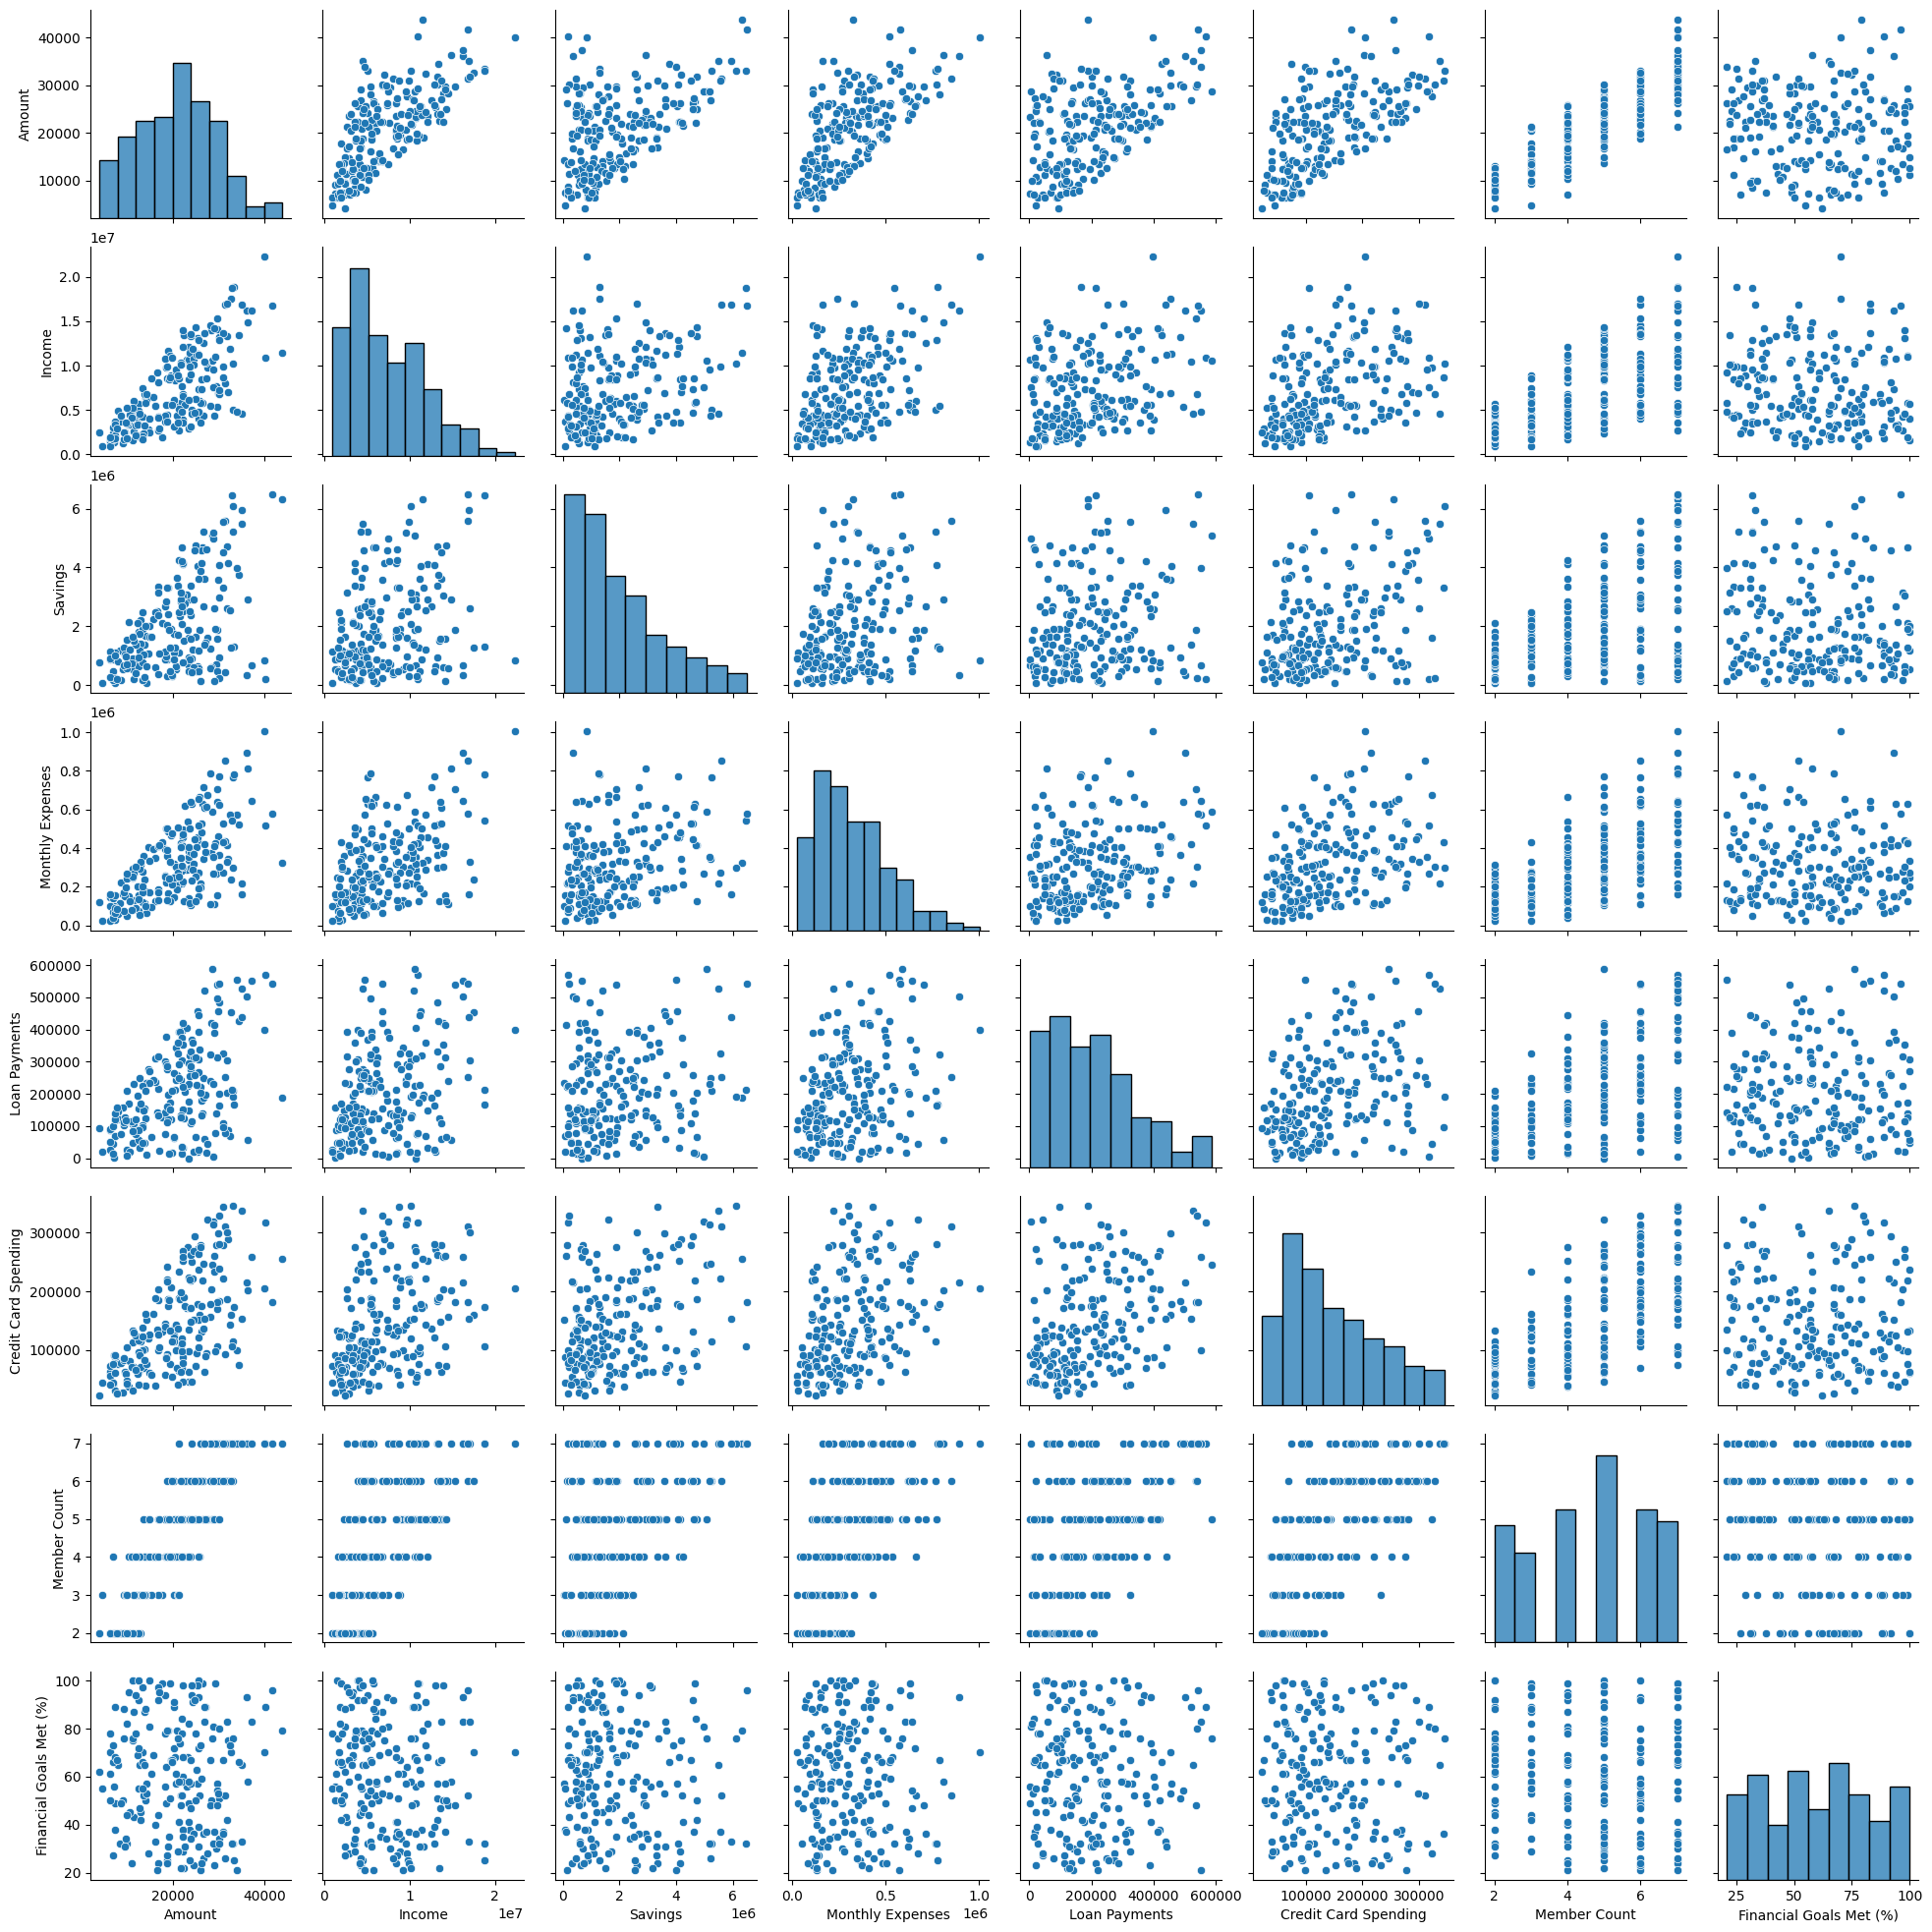

In [14]:
sns.pairplot(familydata)
plt.show()

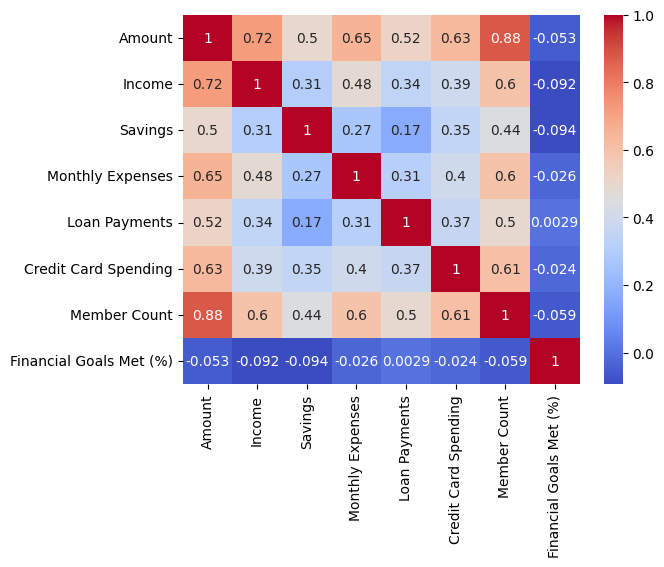

In [18]:
corr = familydata[['Amount','Income','Savings','Monthly Expenses','Loan Payments','Credit Card Spending','Member Count','Financial Goals Met (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [16]:
#so from graphs and corr matrix it's fairly obvious that there is a fairly strong linear relationship between amount, income and some corr bw amount expenses and spending
# Higher loan payments == lower savings and vice versa; more savings == less loan payments; more members == more spending
# Questions to still investigate:
# 1. What are the outliers and do they carry a message? can they just be removed?

In [ ]:
#Building Financial scoring model factors
familydata['Savings to Income'] = familydata['Savings']/familydata['Income']
familydata['Expense ratio'] = (familydata['Monthly Expenses']/familydata['Income'])*100
familydata['Loan ratio'] = (familydata['Loan Payments']/familydata['Income'])*100

# Add credit card spending trends
# Add cateogory based spending trends
# Provide scoring weights for each of these factors and convert into a working function to find human health (decide using which model and stuff)


